In [1]:
import msise00
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [8]:
atmos = msise00.run(time=datetime(2013, 3, 31, 12), altkm=np.linspace(0,500,1000), glat=65., glon=-148.)

/opt/homebrew/lib/python3.9/site-packages/geomagindices/base.py:37: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  i = [dat.index.get_loc(t, method="nearest") for t in dtime]


In [3]:
atmos

<xarray.Dataset>
Dimensions:     (time: 1, alt_km: 1000, lat: 1, lon: 1)
Coordinates:
  * time        (time) datetime64[ns] 2013-03-31T12:00:00
  * alt_km      (alt_km) float64 0.0 0.1001 0.2002 0.3003 ... 99.8 99.9 100.0
  * lat         (lat) float64 65.0
  * lon         (lon) float64 -148.0
Data variables:
    He          (time, alt_km, lat, lon) float64 1.461e+20 ... 1.255e+14
    O           (time, alt_km, lat, lon) float64 0.0 0.0 ... 4.289e+17 4.273e+17
    N2          (time, alt_km, lat, lon) float64 2.177e+25 ... 1.099e+19
    O2          (time, alt_km, lat, lon) float64 5.841e+24 ... 2.52e+18
    Ar          (time, alt_km, lat, lon) float64 2.604e+23 ... 1.12e+17
    Total       (time, alt_km, lat, lon) float64 1.34 1.323 ... 6.635e-07
    H           (time, alt_km, lat, lon) float64 0.0 0.0 ... 2.34e+13 2.318e+13
    N           (time, alt_km, lat, lon) float64 0.0 0.0 ... 2.901e+11 2.92e+11
    AnomalousO  (time, alt_km, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Tn          (time, alt_km, lat, lon) float64 260.4 260.3 ... 183.1 183.1
    Texo        (time, alt_km, lat, lon) float64 1.027e+03 ... 1.027e+03
Attributes:
    species:  ['He', 'O', 'N2', 'O2', 'Ar', 'Total', 'H', 'N', 'AnomalousO']
    f107s:    109.50756172839505
    f107:     113.1
    Ap:       3

/var/folders/95/2gtjccms72s2v7wsktz_j2r80000gn/T/ipykernel_42466/2532197000.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


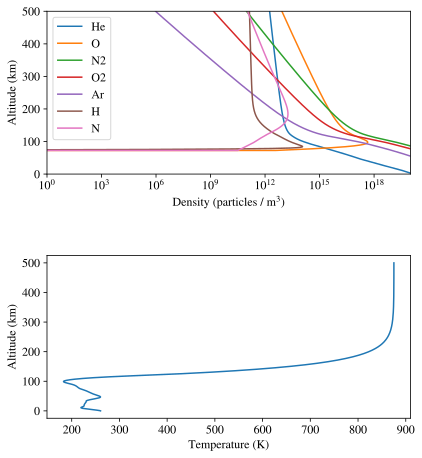

In [10]:
tn = np.array(atmos['Tn']).flatten()
total = np.array(atmos['Total']).flatten()
alt = np.array(atmos['alt_km']).flatten()

he = np.array(atmos['He']).flatten()
o = np.array(atmos['O']).flatten()
n2 = np.array(atmos['N2']).flatten()
o2 = np.array(atmos['O2']).flatten()
ar = np.array(atmos['Ar']).flatten()
h = np.array(atmos['H']).flatten()
n = np.array(atmos['N']).flatten()

fig = plt.figure(figsize=(6.52437527778,7.5))
gs = plt.GridSpec(nrows=2, ncols=1,hspace=.5,wspace=.545)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

ax1.semilogx(he,alt, label='He')
ax1.semilogx(o,alt, label='O')
ax1.semilogx(n2,alt, label='N2')
ax1.semilogx(o2,alt, label='O2')
ax1.semilogx(ar,alt, label='Ar')
ax1.semilogx(h,alt, label='H')
ax1.semilogx(n,alt,label='N')

ax2.plot(tn,alt)

ax1.legend()
ax1.set_xlim(1,1e20)
ax1.set_ylim(0,500)

ax1.set_ylabel('Altitude (km)')
ax1.set_xlabel('Density (particles / m$^3$)')

ax2.set_ylabel('Altitude (km)')
ax2.set_xlabel('Temperature (K)')

plt.savefig('/Users/patrick/Documents/phd/GitHub/thesis/figures/chapter_3/msis_eval/msis_eval.pdf')

fig.show()